In [1]:
import numpy as np
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
plt.style.use("ggplot")
plt.rcParams.update({'font.size': 12})

In [2]:
# https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29
data = pd.read_csv("breast_cancer.csv", index_col="id")

In [3]:
print("Datassa on %i riviä eli potilaan kasvainta ja %i saraketta eli muuttujaa" % data.shape)

Datassa on 569 riviä eli potilaan kasvainta ja 32 saraketta eli muuttujaa


In [4]:
# Onko jokin potilas kirjattu kaksi kertaa?
data.index.unique().size

569

In [5]:
# Mitä tietotyyppejä muuttujat edustavat ja onko puuttuvia arvoja?
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se        

In [6]:
# Poistetaan muuttuja "Unnamed: 32", joka sisältää vain puuttuvia arvoja
data = data.drop("Unnamed: 32", axis=1)

In [7]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

Pahanlaatuisia kasvaimia:  212
Hyvänlaatuisia kasvaimia:  357


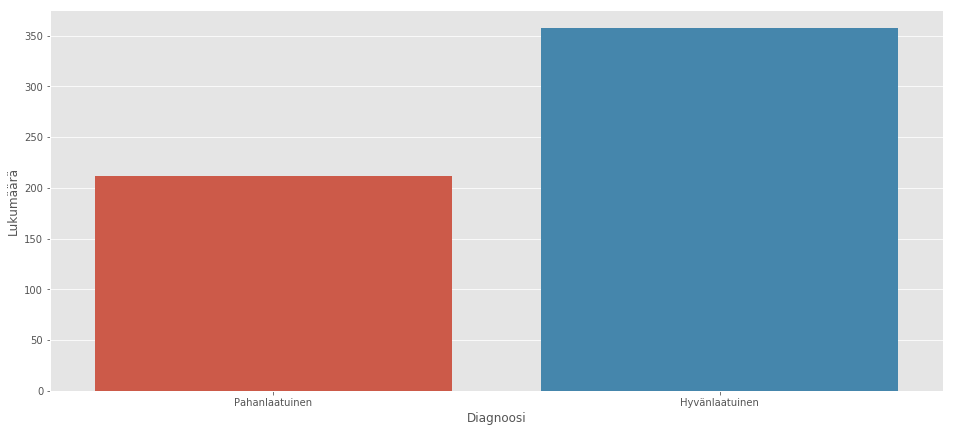

In [8]:
# M = Malignant = Pahanlaatuinen
# B = Benign = Hyvänlaatuinen
ax = plt.figure(figsize=(16, 7)).add_subplot(111)
sns.countplot(data.diagnosis.replace({"M": "Pahanlaatuinen", "B": "Hyvänlaatuinen"}), ax=ax)
ax.set_xlabel("Diagnoosi")
ax.set_ylabel("Lukumäärä")
print('Pahanlaatuisia kasvaimia: ', data.diagnosis.value_counts()["M"])
print('Hyvänlaatuisia kasvaimia: ', data.diagnosis.value_counts()["B"])

In [9]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


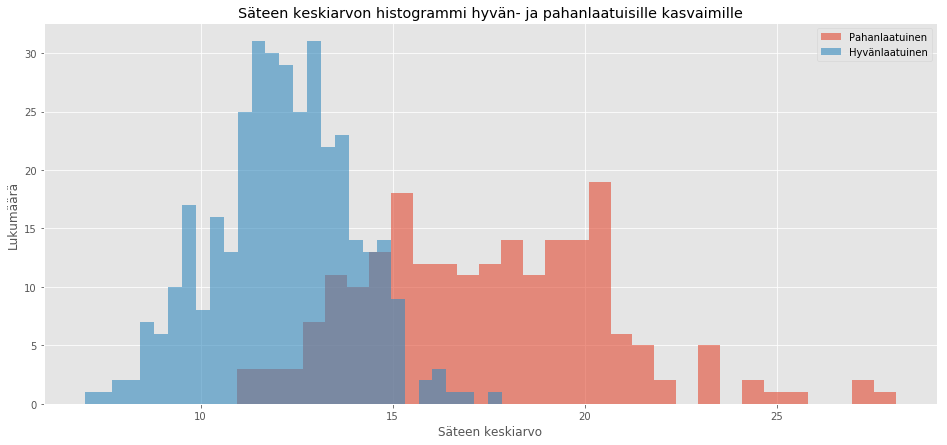

In [10]:
ax = plt.figure(figsize=(16, 7)).add_subplot(111)
plt.hist(data[data.diagnosis == "M"].radius_mean, bins=30, label="Pahanlaatuinen", alpha=0.6)
plt.hist(data[data.diagnosis == "B"].radius_mean, bins=30, label="Hyvänlaatuinen", alpha=0.6)
plt.legend()
plt.xlabel("Säteen keskiarvo")
plt.ylabel("Lukumäärä")
plt.title("Säteen keskiarvon histogrammi hyvän- ja pahanlaatuisille kasvaimille")
plt.show()

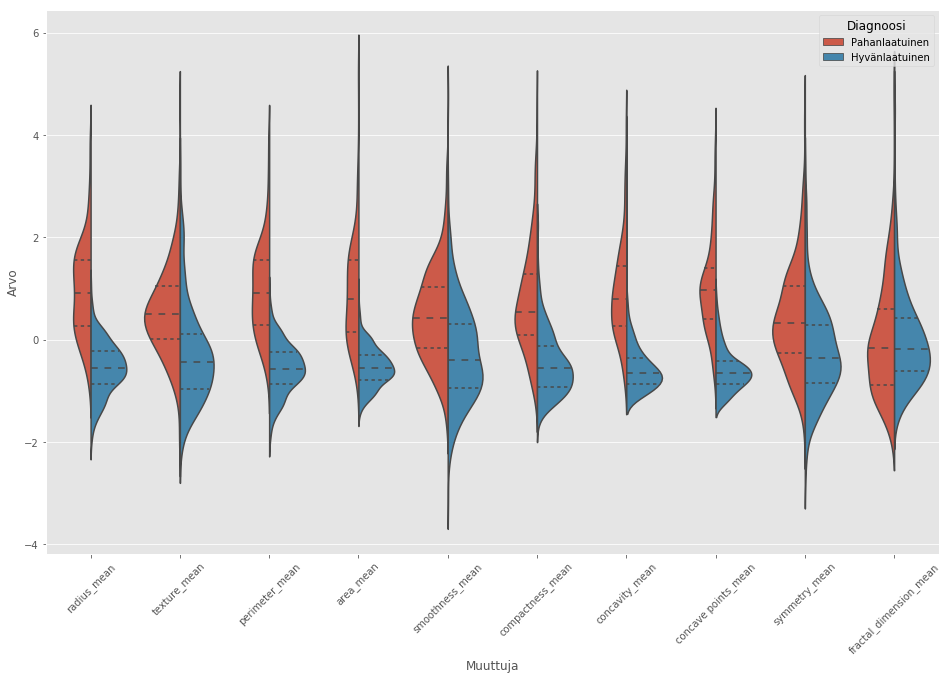

In [11]:
y = data.diagnosis.replace({"M": "Pahanlaatuinen", "B": "Hyvänlaatuinen"})
x = data.drop("diagnosis", axis=1)
x = (x - x.mean()) / (x.std())

x_first_10 = pd.concat([y, x.iloc[:, :10]], axis=1)
x_first_10_melt = pd.melt(x_first_10, id_vars="diagnosis", var_name="features", value_name="value")
x_first_10_melt = x_first_10_melt.rename(columns={"diagnosis": "Diagnoosi"})
ax = plt.figure(figsize=(16,10)).add_subplot(111)
sns.violinplot(x="features", y="value", hue="Diagnoosi", data=x_first_10_melt, split=True, inner="quart", subplots=True)
plt.xticks(rotation=45)
ax.set_ylabel("Arvo")
ax.set_xlabel("Muuttuja");

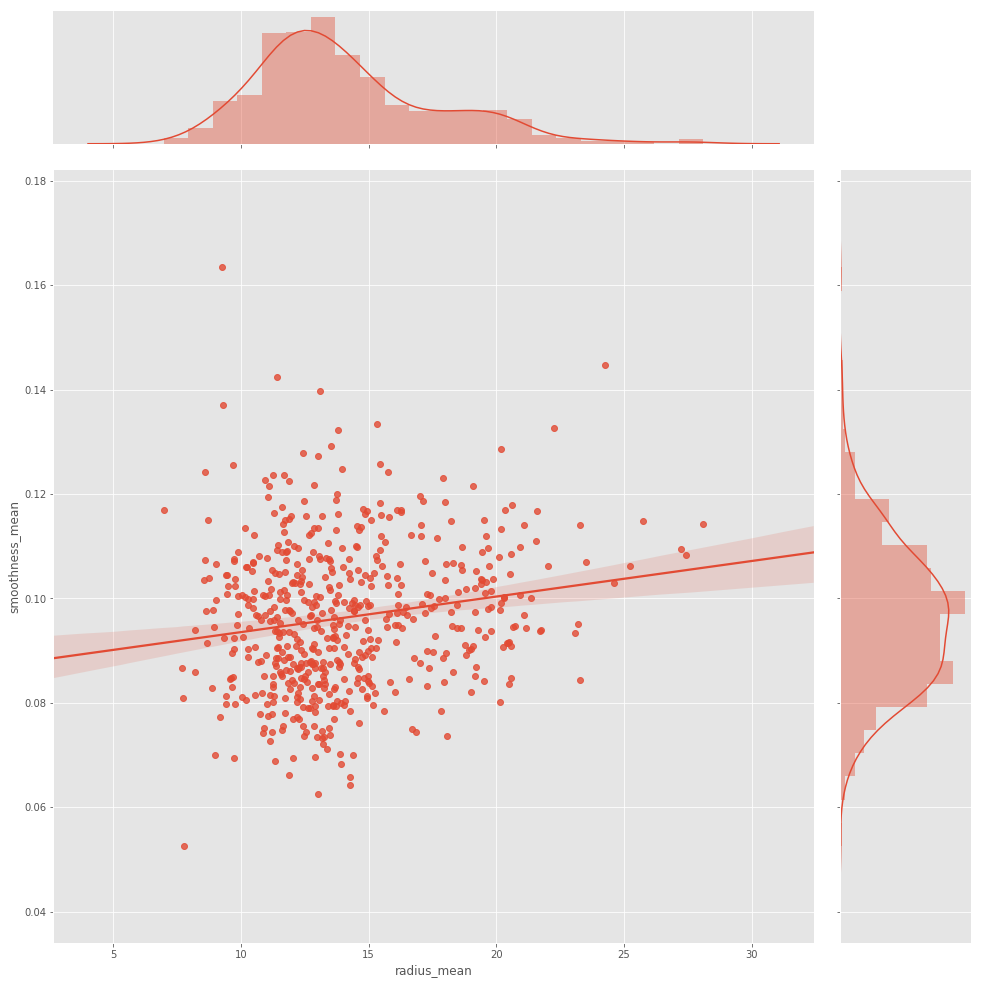

In [12]:
grid = sns.jointplot(data.radius_mean, data.smoothness_mean, kind="regg");
grid.fig.set_figwidth(15)
grid.fig.set_figheight(15)

Tarkkuus: 93.57 %


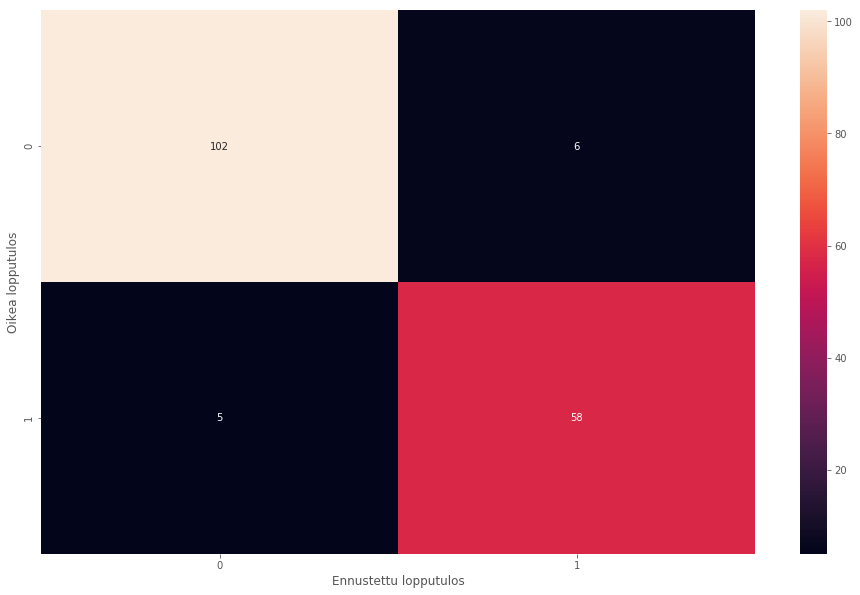

In [27]:
y = data.diagnosis.replace({"Pahanlaatuinen": 1, "Hyvänlaatuinen": 0})
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
clf_rf = RandomForestClassifier(random_state=43)      
clf_rf.fit(x_train, y_train)
ac = accuracy_score(y_test, clf_rf.predict(x_test))
print("Tarkkuus: %.2f %%" % (ac*100))
cm = confusion_matrix(y_test, clf_rf.predict(x_test))
ax = plt.figure(figsize=(16,10)).add_subplot(111)
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('Oikea lopputulos')
plt.xlabel('Ennustettu lopputulos');

In [14]:
from collections import OrderedDict
feat_importances_vals = clf_rf.feature_importances_
feat_importances_vals_sorted, feat_names_sorted = zip(*sorted(zip(feat_importances_vals, x_train.columns), reverse=True))
feat_importances_vals_sorted_rel = np.array(feat_importances_vals_sorted)
feat_importances_vals_sorted_rel /= feat_importances_vals_sorted_rel.sum()
feat_importances_vals_sorted_rel *= 100
sorted_relative_feat_importances = OrderedDict(zip(feat_names_sorted, feat_importances_vals_sorted_rel))

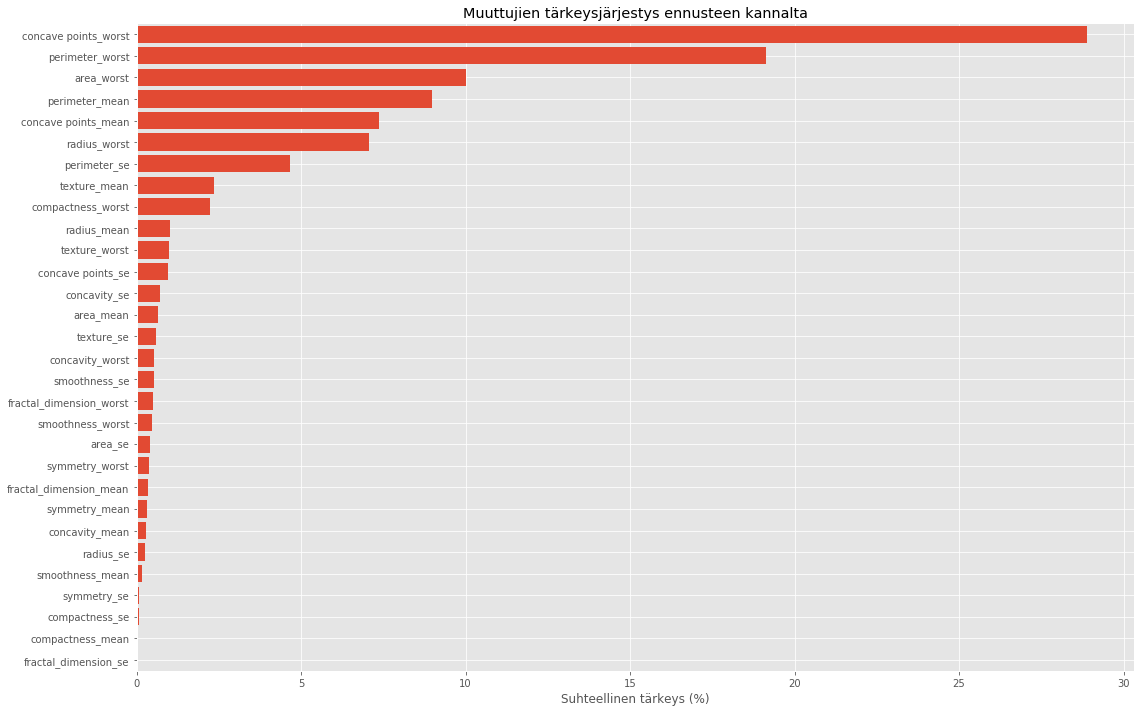

In [15]:
ax = plt.figure(figsize=(16, 10)).add_subplot(111)
n_feats = len(feat_importances_vals)
y_pos = list(reversed(range(n_feats)))
feat_names_show = list(sorted_relative_feat_importances.keys())[:n_feats]
feat_importances_show = list(sorted_relative_feat_importances.values())[:n_feats]
ax.barh(y_pos, feat_importances_show, align='center')
ax.set_xlabel("Suhteellinen tärkeys (%)")
plt.title("Muuttujien tärkeysjärjestys ennusteen kannalta")
plt.yticks(y_pos, feat_names_show)
plt.ylim(np.min(y_pos) - 0.5, np.max(y_pos) + 0.5)
plt.tight_layout()